In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-csv/README.md
/kaggle/input/diabetes-csv/diabetes classification using tensorflow.ipynb
/kaggle/input/diabetes-csv/diabetes.csv


In [2]:
#Loading dataset
data = pd.read_csv('/kaggle/input/diabetes-csv/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


 # **Pairplot**

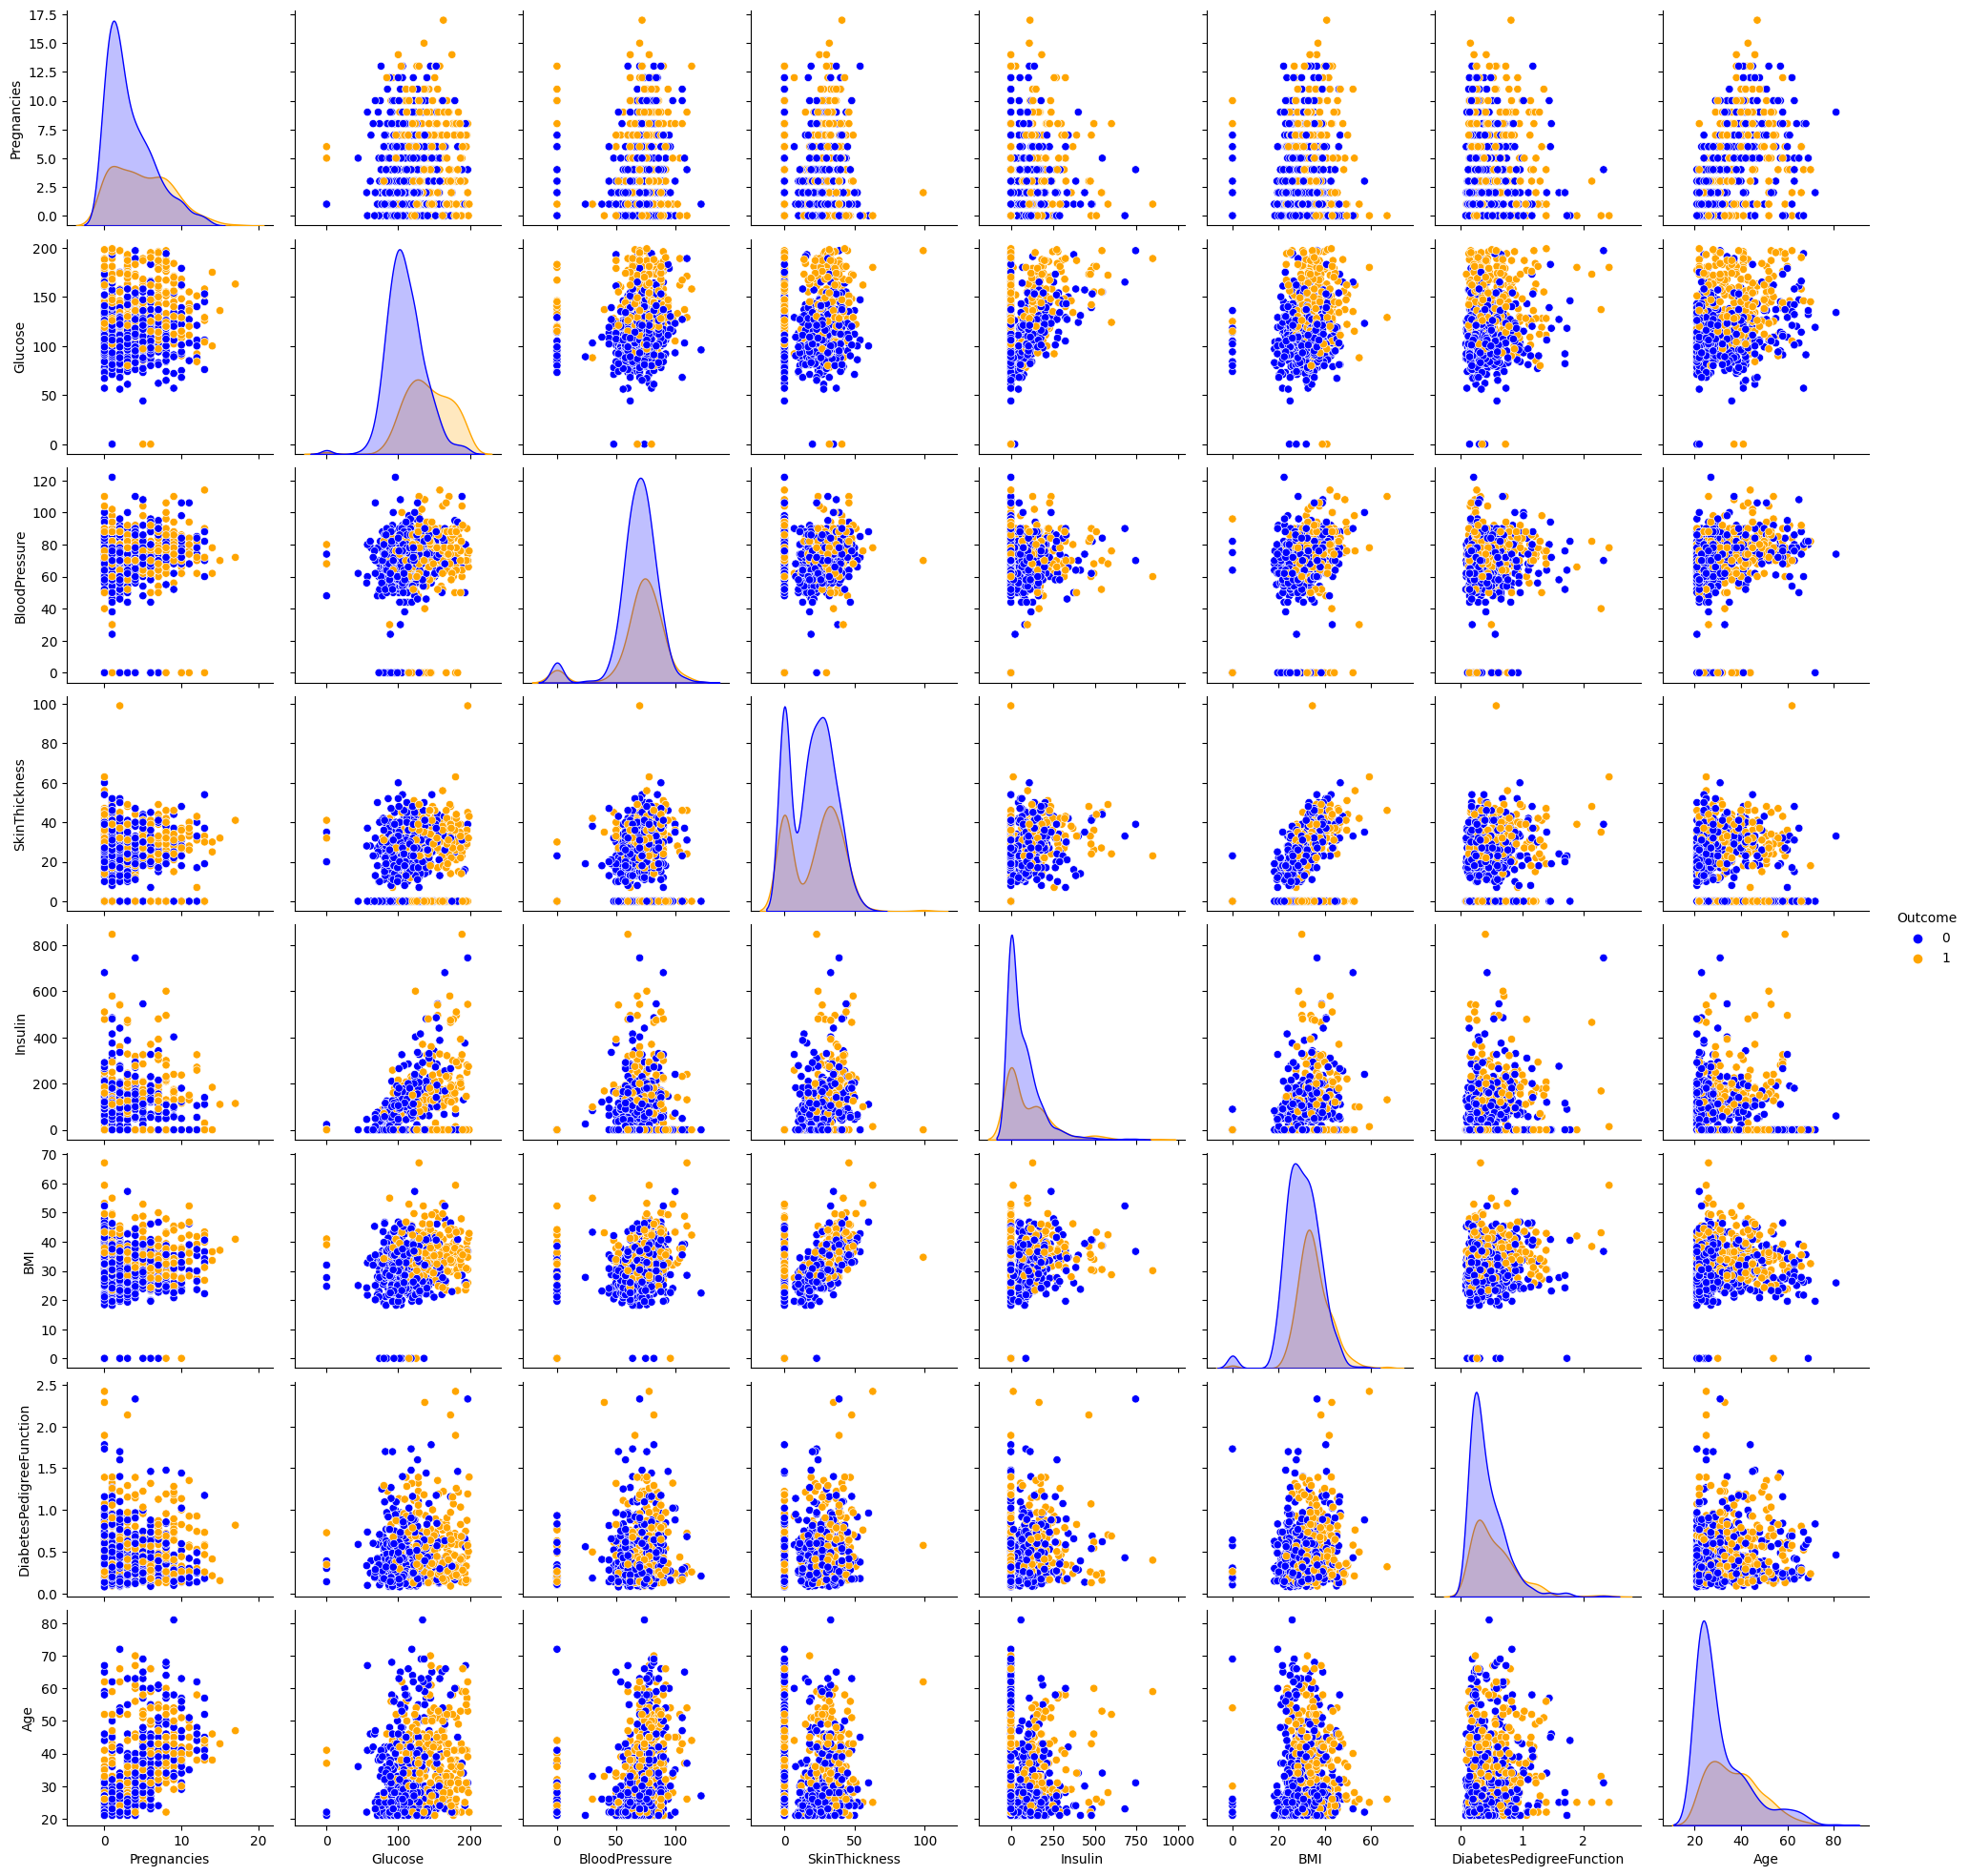

In [3]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)

sns.pairplot(data, hue='Outcome', palette={0: 'blue', 1: 'orange'})

plt.show()

# **Heatmap**

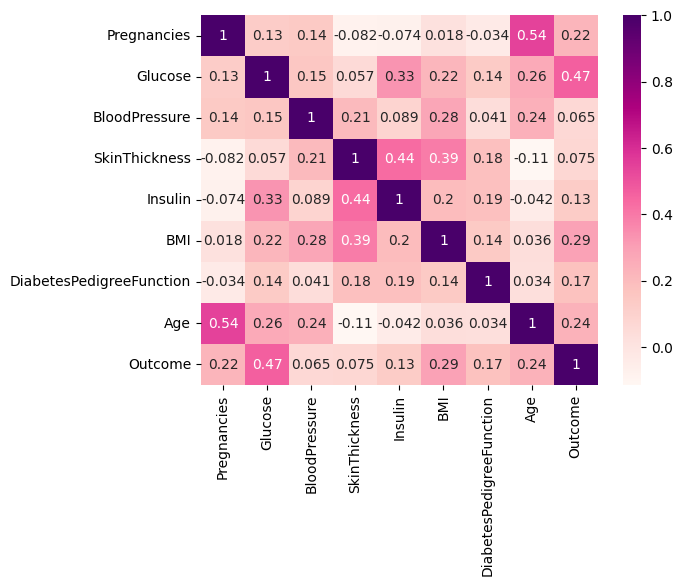

In [4]:
dataplot = sns.heatmap(data.corr(numeric_only=True), cmap="RdPu", annot=True)

plt.show()

In [5]:
data.replace(0, np.nan, inplace=True)

data['Outcome'] = data['Outcome'].fillna(0)

print(data.head(60))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           6.0    148.0           72.0           35.0      NaN  33.6   
1           1.0     85.0           66.0           29.0      NaN  26.6   
2           8.0    183.0           64.0            NaN      NaN  23.3   
3           1.0     89.0           66.0           23.0     94.0  28.1   
4           NaN    137.0           40.0           35.0    168.0  43.1   
5           5.0    116.0           74.0            NaN      NaN  25.6   
6           3.0     78.0           50.0           32.0     88.0  31.0   
7          10.0    115.0            NaN            NaN      NaN  35.3   
8           2.0    197.0           70.0           45.0    543.0  30.5   
9           8.0    125.0           96.0            NaN      NaN   NaN   
10          4.0    110.0           92.0            NaN      NaN  37.6   
11         10.0    168.0           74.0            NaN      NaN  38.0   
12         10.0    139.0           80.0            

In [6]:
data.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# **Handling Missing Values:**

In [7]:
column_name = 'Pregnancies'

median_value = data[column_name].median()
median_value

data.loc[:, column_name] = data[column_name].fillna(median_value)

print("Total null values in each column after filling NaN:")
print(data.isnull().sum())

Total null values in each column after filling NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
column_name = 'Glucose'

median_value = data[column_name].median()
median_value

data.loc[:, column_name] = data[column_name].fillna(median_value)

print("Total null values in each column after filling NaN:")
print(data.isnull().sum())

Total null values in each column after filling NaN:
Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [9]:
column_name = 'BloodPressure'

median_value = data[column_name].median()
median_value

data.loc[:, column_name] = data[column_name].fillna(median_value)

print("Total null values in each column after filling NaN:")
print(data.isnull().sum())

Total null values in each column after filling NaN:
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [10]:
column_name = 'SkinThickness'

median_value = data[column_name].median()
median_value

data.loc[:, column_name] = data[column_name].fillna(median_value)

print("Total null values in each column after filling NaN:")
print(data.isnull().sum())

Total null values in each column after filling NaN:
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [11]:
column_name = 'Insulin'

median_value = data[column_name].median()
median_value

data.loc[:, column_name] = data[column_name].fillna(median_value)

print("Total null values in each column after filling NaN:")
print(data.isnull().sum())

Total null values in each column after filling NaN:
Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64


In [12]:
column_name = 'BMI'

median_value = data[column_name].median()
median_value

data.loc[:, column_name] = data[column_name].fillna(median_value)

print("Total null values in each column after filling NaN:")
print(data.isnull().sum())

Total null values in each column after filling NaN:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

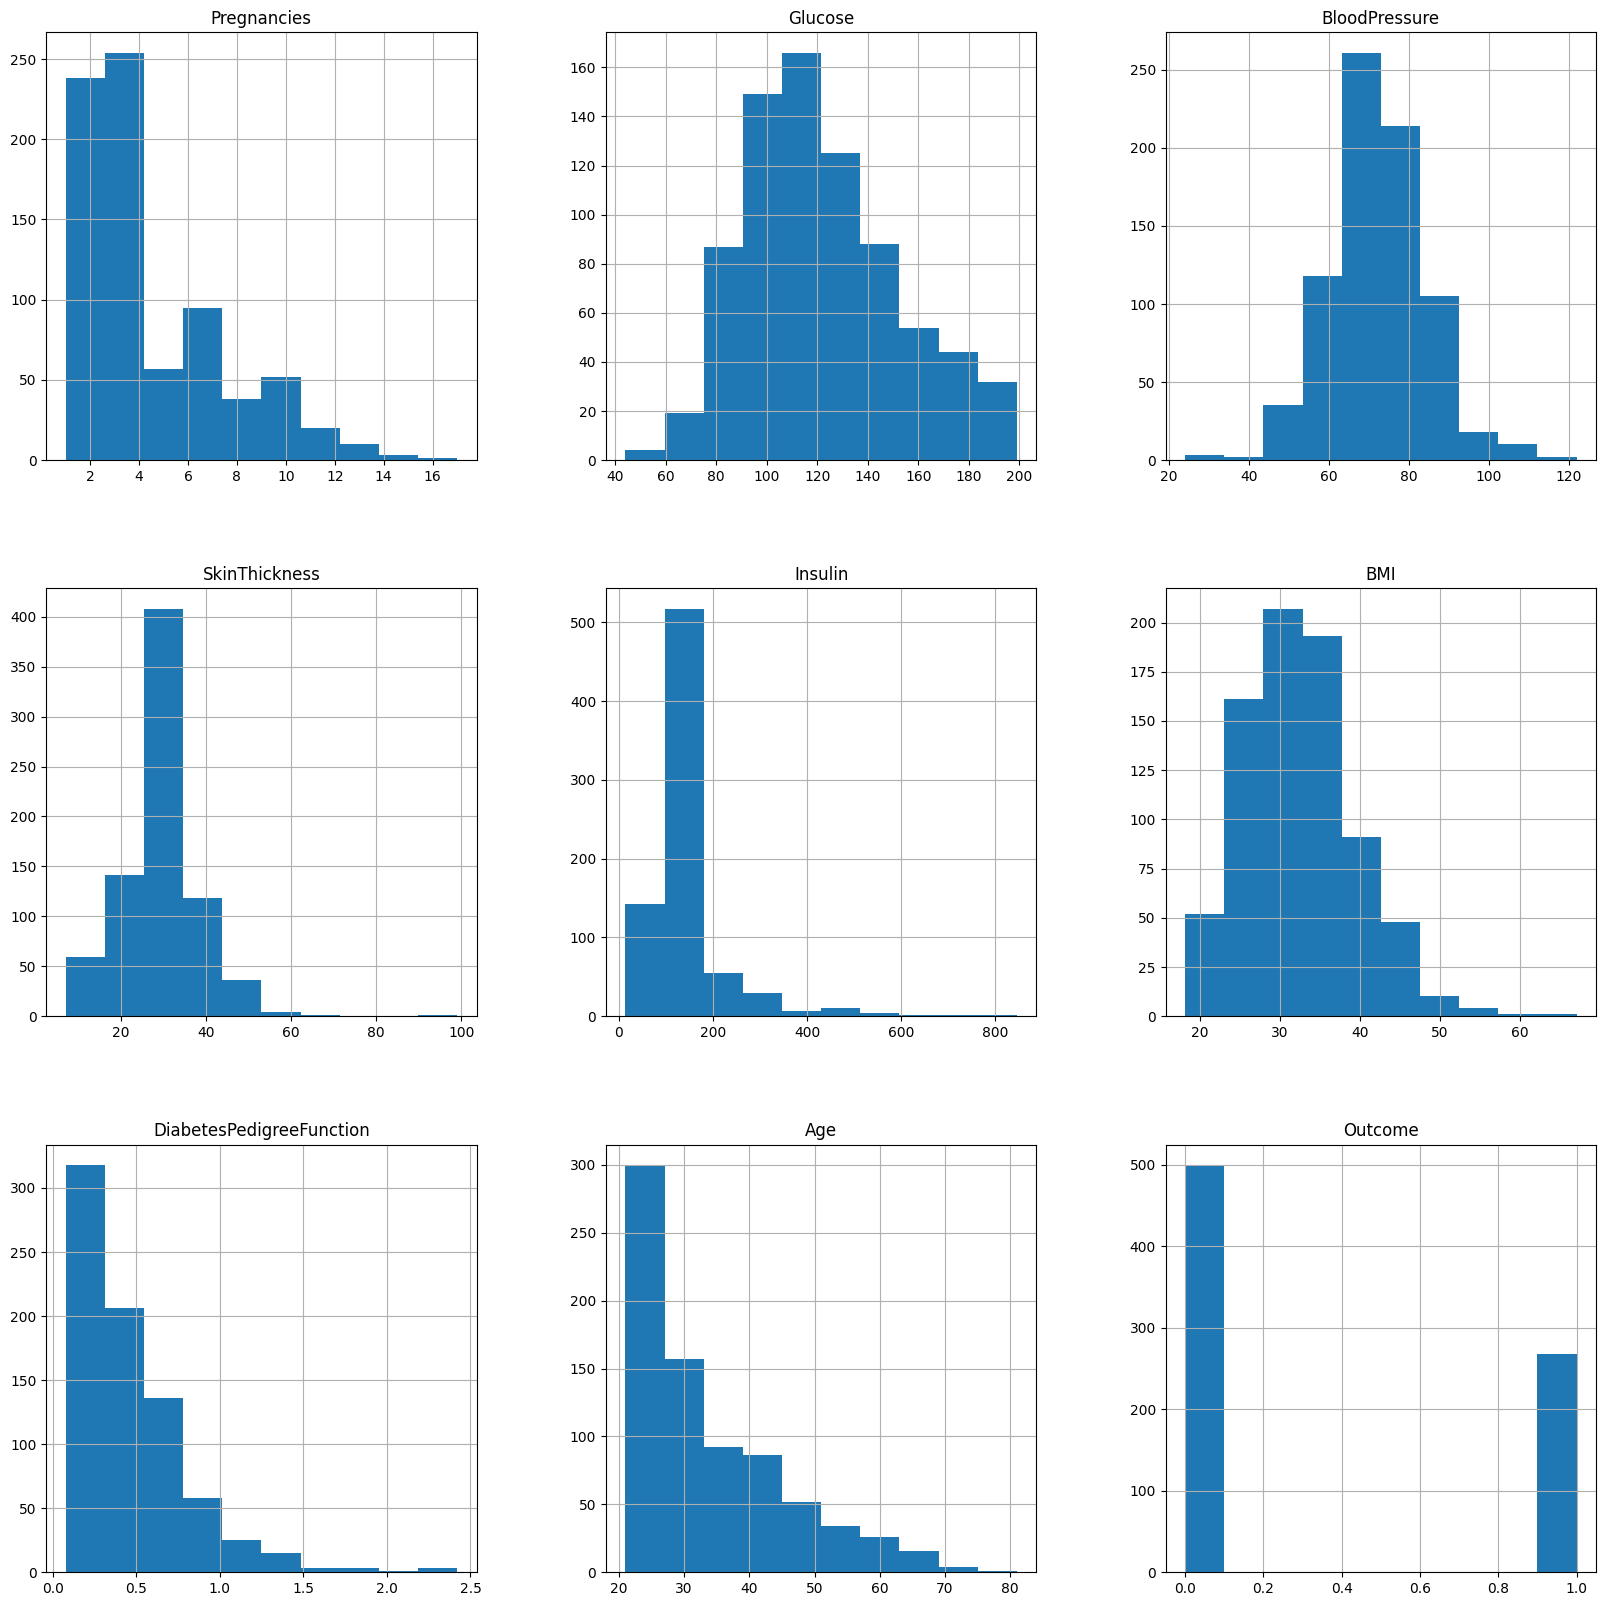

In [14]:
data.hist(figsize=(20,20))
plt.show()

In [15]:
X = data.iloc[: , :-1]
y = data.iloc[ : , -1]

In [16]:
from sklearn.model_selection import train_test_split



X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)



print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# **A) Support Vector Machine:**

In [18]:
svc = SVC()

svc.fit(X_train, y_train)

y_pred_test = svc.predict(X_test)

y_pred_test


print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

from sklearn.metrics import confusion_matrix

cm_svc = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm_svc)

print('\nTrue Positives(TP) = ', cm_svc[1,1])

print('\nTrue Negatives(TN) = ', cm_svc[0,0])

print('\nFalse Positives(FP) = ', cm_svc[0,1])

print('\nFalse Negatives(FN) = ', cm_svc[1,0])

sensitivity_svc = cm_svc[1, 1] / (cm_svc[1, 1] + cm_svc[1, 0])

print('\nSensitivity: ', sensitivity_svc)

Model accuracy score: 0.7727
Confusion matrix

 [[94 13]
 [22 25]]

True Positives(TP) =  25

True Negatives(TN) =  94

False Positives(FP) =  13

False Negatives(FN) =  22

Sensitivity:  0.5319148936170213


# **B) Random Forest:**

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_rf)))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion matrix\n\n', cm_rf)

print('\nTrue Positives(TP) = ', cm_rf[1,1])
print('\nTrue Negatives(TN) = ', cm_rf[0,0])
print('\nFalse Positives(FP) = ', cm_rf[0,1])
print('\nFalse Negatives(FN) = ', cm_rf[1,0])

sensitivity_rf = cm_rf[1, 1] / (cm_rf[1, 1] + cm_rf[1, 0])
print('\nSensitivity: ', sensitivity_rf)


Random Forest Model accuracy score: 0.7857
Confusion matrix

 [[91 16]
 [17 30]]

True Positives(TP) =  30

True Negatives(TN) =  91

False Positives(FP) =  16

False Negatives(FN) =  17

Sensitivity:  0.6382978723404256


# **C) Naive Bayes:**

In [20]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print('Naive Bayes Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_nb)))

cm_nb = confusion_matrix(y_test, y_pred_nb)
print('Confusion matrix\n\n', cm_nb)

print('\nTrue Positives(TP) = ', cm_nb[1,1])
print('\nTrue Negatives(TN) = ', cm_nb[0,0])
print('\nFalse Positives(FP) = ', cm_nb[0,1])
print('\nFalse Negatives(FN) = ', cm_nb[1,0])

sensitivity_nb = cm_nb[1, 1] / (cm_nb[1, 1] + cm_nb[1, 0])
print('\nSensitivity: ', sensitivity_nb)


Naive Bayes Model accuracy score: 0.7857
Confusion matrix

 [[92 15]
 [18 29]]

True Positives(TP) =  29

True Negatives(TN) =  92

False Positives(FP) =  15

False Negatives(FN) =  18

Sensitivity:  0.6170212765957447


# **D) Logistic Regression:**

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_lr)))

cm_lr = confusion_matrix(y_test, y_pred_lr)
print('Confusion matrix\n\n', cm_lr)

print('\nTrue Positives(TP) = ', cm_lr[1,1])
print('\nTrue Negatives(TN) = ', cm_lr[0,0])
print('\nFalse Positives(FP) = ', cm_lr[0,1])
print('\nFalse Negatives(FN) = ', cm_lr[1,0])

sensitivity_lr = cm_lr[1, 1] / (cm_lr[1, 1] + cm_lr[1, 0])
print('\nSensitivity: ', sensitivity_lr)


Logistic Regression Model accuracy score: 0.8182
Confusion matrix

 [[98  9]
 [19 28]]

True Positives(TP) =  28

True Negatives(TN) =  98

False Positives(FP) =  9

False Negatives(FN) =  19

Sensitivity:  0.5957446808510638


# **Accuracy VS Sensitivity Comparison:**

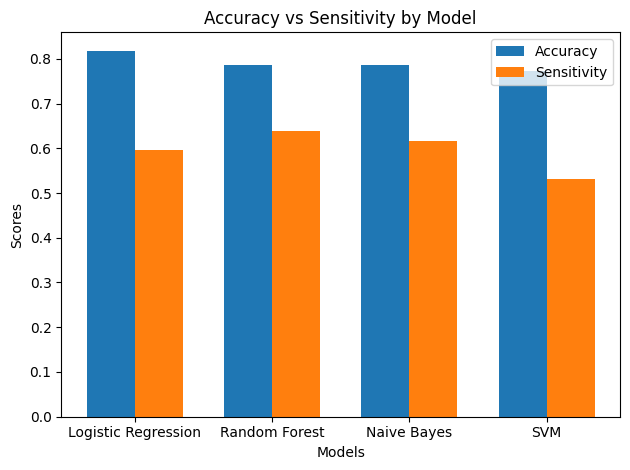

In [22]:
import numpy as np
import matplotlib.pyplot as plt

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svc = accuracy_score(y_test, y_pred_test)

sensitivity_lr = cm_lr[1, 1] / (cm_lr[1, 1] + cm_lr[1, 0])
sensitivity_rf = cm_rf[1, 1] / (cm_rf[1, 1] + cm_rf[1, 0])
sensitivity_nb = cm_nb[1, 1] / (cm_nb[1, 1] + cm_nb[1, 0])
sensitivity_svc = cm_svc[1, 1] / (cm_svc[1, 1] + cm_svc[1, 0])

models = ['Logistic Regression', 'Random Forest', 'Naive Bayes' ,'SVM']
accuracy_scores = [accuracy_lr, accuracy_rf, accuracy_nb, accuracy_svc]
sensitivity_scores = [sensitivity_lr, sensitivity_rf, sensitivity_nb, sensitivity_svc]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, sensitivity_scores, width, label='Sensitivity')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy vs Sensitivity by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()


plt.tight_layout()
plt.show()


In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

base_lr = LogisticRegression()

adb_clf = AdaBoostClassifier(base_estimator=base_lr, n_estimators=100, learning_rate=0.1, random_state=42)
adb_clf.fit(X_train, y_train)

y_pred_adb = adb_clf.predict(X_test)

print('Ensemble AdaBoost with Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_adb)))

cm_adb = confusion_matrix(y_test, y_pred_adb)
print('Confusion matrix\n\n', cm_adb)

print('\nTrue Positives(TP) = ', cm_adb[1,1])
print('\nTrue Negatives(TN) = ', cm_adb[0,0])
print('\nFalse Positives(FP) = ', cm_adb[0,1])
print('\nFalse Negatives(FN) = ', cm_adb[1,0])

sensitivity_adb = cm_adb[1, 1] / (cm_adb[1, 1] + cm_adb[1, 0])
print('\nSensitivity: ', sensitivity_adb)


Ensemble AdaBoost with Logistic Regression Model accuracy score: 0.8312
Confusion matrix

 [[100   7]
 [ 19  28]]

True Positives(TP) =  28

True Negatives(TN) =  100

False Positives(FP) =  7

False Negatives(FN) =  19

Sensitivity:  0.5957446808510638
